<h3> Number 1 </h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

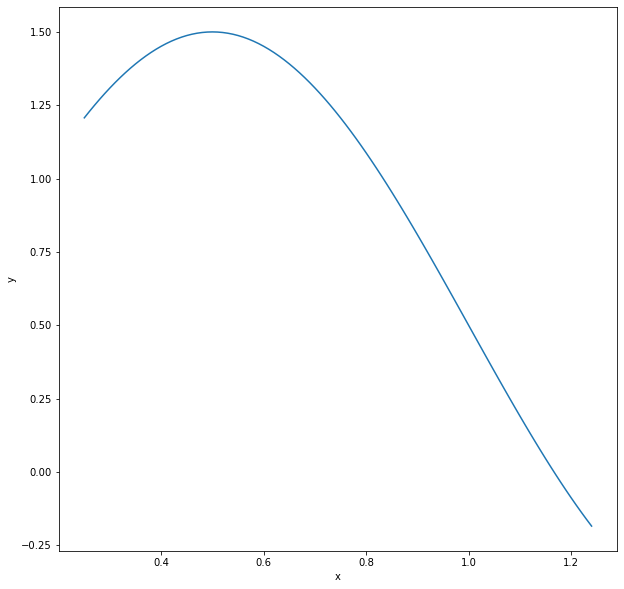

In [2]:
x = np.arange(0.25,1.25,0.01)
y = 0.5 + np.sin(np.pi*x)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

<h3> Number 2 </h3>

In [3]:
from scipy import integrate

In [4]:
ans = integrate.simps(y,x,even='avg')
print('The answer is', ans)

The answer is 0.9521169837863093


<h3> Number 3 </h3>

In [49]:
### Wrong Approach ###
a = 0.25; b = 1.25
N = 1000
ar = np.zeros(N)
integral = 0
for i in range(len(ar)):
        ar[i] = np.random.uniform(a,b)
def f(x):
    y =0.5 + np.sin(np.pi*x)
    return y
for i in ar:
    integral += f(i)
ans = (b-a)/float(N)*integral
print('The answer is', ans)
print('As the value of N increases, the value of the area slowly approach the result in number 2')
### Wrong Approach ###

"\na = 0.25; b = 1.25\nN = 1000\nar = np.zeros(N)\nintegral = 0\nfor i in range(len(ar)):\n        ar[i] = np.random.uniform(a,b)\ndef f(x):\n    y =0.5 + np.sin(np.pi*x)\n    return y\nfor i in ar:\n    integral += f(i)\nans = (b-a)/float(N)*integral\nprint('The answer is', ans)\nprint('As the value of N increases, the value of the area slowly approach the result in number 2')\n"

The answer with the monte carlos is 0.948063111216667


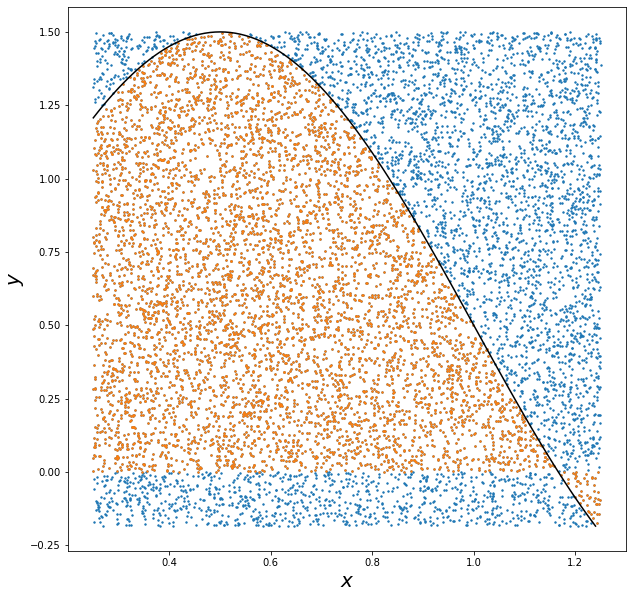

In [52]:
##This part of code establish the x and y interval
##but, note that there is little area in which the position is under the x-axis
x1 = 0.25; x2 = 1.25
y1 = min(y); y2 = max(y)
area = (y2-y1)*(x2-x1)

##create a value with uniform distribution generator for x and y
N = 10000
X = np.random.uniform(low=x1,high=x2,size=N)
Y = np.random.uniform(low=y1,high=y2,size=N)

##Let's count the number of point under the curve (selection criteria)
##X_count and Y_count here is just for the illustration purpose
X_count = []
Y_count = []
count_pos = 0
count_neg = 0
for i in range(N):
    if Y[i] >= 0:
        if Y[i] <= f(X[i]):
            count_pos += 1
            X_count.append(X[i])
            Y_count.append(Y[i])
    elif Y[i] < 0:
        if Y[i] >= f(X[i]):
            count_neg += 1
            X_count.append(X[i])
            Y_count.append(Y[i])
total_count = count_pos - count_neg ##Since we know the area above the y = 0 is bigger the the other one (below y=0)
    
##Let's illustrate
fig,ax = plt.subplots(1,figsize=(10,10))
ax.scatter(X,Y,s=2)
ax.plot(x,y,color='black')
ax.scatter(X_count,Y_count,s=2)
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$y$',fontsize=20)

##let's write down the answer, it's pretty trivial and don't forget to normalize with the square area
print('The answer with the monte carlos is', total_count/N*area)